# Explore the available tracked CCVLs 
## (Coast-Crossing Vapor Lakes)
### remove redundancies, set aside small ones, plot interesting ones

<a href='#time-latclimo'>Time-latitude climatology of landfalls</a>

<a href='#eqlongcases'>Equatorial long-lived cases</a>

In [1]:
!date

Mon Apr 25 08:54:56 EDT 2022


In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import geopandas as gp

from datetime import datetime

from IPython.display import display, Markdown, Latex

### First, define a function showme(filename, title) for one ccvl
#### and a wrapper showall(df), for a dataframe of lakes df.

In [29]:
# THIS PLOTS THE CONTOURS AS ISOCHRONES, RAINBOW COLORED BY HOUR IN THE LIFETIME
# Also, makes a Worldview link to the landfall hour

# Legend is unreadable, but colorbar is tricky to construct... Just use title for now
# someday, learn: 
# https://stackoverflow.com/questions/30779712/show-matplotlib-colorbar-instead-of-legend-for-multiple-plots-with-gradually-cha

def showme(filename, title):   # like '2014_05_15_02_lat9p247N.geojson'
    
    # Make Worldview URL 
    wURL = 'https://worldview.earthdata.nasa.gov/?v=25,-37,110,20&l=IMERG_Precipitation_Rate(hidden,opacity=0.48,palette=red_1;),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.51,max=11.1,squash=true),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Ascending(hidden,opacity=0.5,max=11.1,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.5,max=10.8,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Ascending(hidden,max=11.1,squash=true),Reference_Features_15m,Coastlines_15m,Graticule,SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Descending(hidden),SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Ascending(hidden),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Descending(opacity=0.24,palette=rainbow_2,min=50,max=69,squash=true),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Ascending(opacity=0.3,palette=rainbow_2,min=50.5,max=68,squash=true),GHRSST_L4_MUR25_Sea_Surface_Temperature_Anomalies(hidden,palette=divergent_1),MODIS_Aqua_CorrectedReflectance_TrueColor(hidden),MODIS_Terra_CorrectedReflectance_TrueColor(hidden),VIIRS_SNPP_CorrectedReflectance_TrueColor&lg=true'
    yyyy=filename[0:4]
    mm  =filename[5:7]
    dd  =filename[8:10]
    hh  =filename[11:13]
    timestr = '&t='+yyyy+'-'+mm+'-'+dd+'-'+hh+'%3A00%3A00Z)' # close parentheses for the Markdown here
    # Make a Markdown cell with the link 
    display(Markdown('[Worldview @landfall: '+filename[0:13]+']('+wURL+timestr))

    # Make an isochrone plot from GEOJSONS folder 
    gdf = gp.read_file('GEOJSONS/'+filename)
    fig, ax = plt.subplots(figsize=[10,8])
    ax.set_aspect('equal')
    ax.set_xlim(30, 93)
    ax.set_ylim(-30,30)

    gdf.drop_duplicates().plot(ax=ax, column='time', facecolor='none', \
                               cmap='jet', alpha=1) #, legend=True)

    #gdf.boundary.plot(ax=ax, color='black')
    path = gp.datasets.get_path('naturalearth_lowres') # Geography background
    mapdf = gp.read_file(path)
    mapdf.boundary.plot(ax=ax)
    
    ax.set_title(title)

    return(gdf)


In [4]:
def plotall(df):

    # LOOP AND PLOT! 
    for i in range(len(df)): 
        showit = df.iloc[i]
        gdf = showme('GEOJSONS/'+showit.filename, 
                     title=showit.duration[0:12] +
                     ' until '+showit.lasttime[0:16]+
                     '    file '+showit.filename)

In [5]:
!ls ccvls_stats*

ccvls_stats.csv               ccvls_stats_201804-202202.csv
ccvls_stats_2014-2018.csv


In [6]:
df = pd.read_csv('ccvls_stats_201804-202202.csv')
df

Unnamed: 0                    lasttime                duration  \
0              0  2022-02-28 23:00:00.000003  1 days 04:00:00.000006   
1              1  2022-02-27 23:00:00.000003  0 days 04:00:00.000006   
2              2  2022-02-27 23:00:00.000003  0 days 04:00:00.000006   
3              3  2022-02-28 23:00:00.000003  2 days 04:00:00.000006   
4              4  2022-02-27 12:59:59.999997         0 days 18:00:00   
...          ...                         ...                     ...   
2745        2745  2018-03-03 12:59:59.999997         0 days 06:00:00   
2746        2746  2018-03-03 03:59:59.999997         0 days 03:00:00   
2747           0  2018-03-02 15:59:59.999997  0 days 16:59:59.999994   
2748           0  2018-03-02 09:00:00.000000  0 days 09:59:59.999997   
2749           0  2018-03-02 02:00:00.000003         0 days 03:00:00   

          areatime  tqv_values     maxarea                         filename  
0       403.382389        55.0   25.625271  2022_02_28_23_lat15p14S.geojson  
1        84.899747        55.0   25.625271  2022_02_27_23_lat12p49S.geojson  
2        84.899747        55.0   25.625271  2022_02_27_23_lat12p49S.geojson  
3     10891.450478        55.0  398.955285  2022_02_28_23_lat15p73S.geojson  
4      5918.495340        55.0  398.955285  2022_02_27_12_lat14p06S.geojson  
...            ...         ...         ...                              ...  
2745   2882.466020        55.0  425.849498  2018_03_03_12_lat12p59S.geojson  
2746     15.982624        55.0    8.214661  2018_03_03_03_lat21p04S.geojson  
2747   5334.687478        55.0  470.258889  2018_03_02_15_lat9p429S.geojson  
2748     84.048796        55.0    9.124369  2018_03_02_09_lat0p592N.geojson  
2749      6.245155        55.0    2.342925  2018_03_02_02_lat18p85S.geojson  

[2750 rows x 7 columns]

# Minimize redundancies 

# Preprocessing
1. drop_duplicates based on maxarea and terminal time
2. add columns dur_days, yyyy, mm, meanlat
3. drop Unnamed column, index of .to_file(...csv)
4. reindex

In [7]:
ymdh = [df.filename.values[i][0:13] for i in range(len(df))]
#ymdh
df['ymdh'] = ymdh
df

Unnamed: 0                    lasttime                duration  \
0              0  2022-02-28 23:00:00.000003  1 days 04:00:00.000006   
1              1  2022-02-27 23:00:00.000003  0 days 04:00:00.000006   
2              2  2022-02-27 23:00:00.000003  0 days 04:00:00.000006   
3              3  2022-02-28 23:00:00.000003  2 days 04:00:00.000006   
4              4  2022-02-27 12:59:59.999997         0 days 18:00:00   
...          ...                         ...                     ...   
2745        2745  2018-03-03 12:59:59.999997         0 days 06:00:00   
2746        2746  2018-03-03 03:59:59.999997         0 days 03:00:00   
2747           0  2018-03-02 15:59:59.999997  0 days 16:59:59.999994   
2748           0  2018-03-02 09:00:00.000000  0 days 09:59:59.999997   
2749           0  2018-03-02 02:00:00.000003         0 days 03:00:00   

          areatime  tqv_values     maxarea                         filename  \
0       403.382389        55.0   25.625271  2022_02_28_23_lat15p14S.geojson   
1        84.899747        55.0   25.625271  2022_02_27_23_lat12p49S.geojson   
2        84.899747        55.0   25.625271  2022_02_27_23_lat12p49S.geojson   
3     10891.450478        55.0  398.955285  2022_02_28_23_lat15p73S.geojson   
4      5918.495340        55.0  398.955285  2022_02_27_12_lat14p06S.geojson   
...            ...         ...         ...                              ...   
2745   2882.466020        55.0  425.849498  2018_03_03_12_lat12p59S.geojson   
2746     15.982624        55.0    8.214661  2018_03_03_03_lat21p04S.geojson   
2747   5334.687478        55.0  470.258889  2018_03_02_15_lat9p429S.geojson   
2748     84.048796        55.0    9.124369  2018_03_02_09_lat0p592N.geojson   
2749      6.245155        55.0    2.342925  2018_03_02_02_lat18p85S.geojson   

               ymdh  
0     2022_02_28_23  
1     2022_02_27_23  
2     2022_02_27_23  
3     2022_02_28_23  
4     2022_02_27_12  
...             ...  
2745  2018_03_03_12  
2746  2018_03_03_03  
2747  2018_03_02_15  
2748  2018_03_02_09  
2749  2018_03_02_02  

[2750 rows x 8 columns]

# drop duplicates (u for unique)

In [8]:
dfu = df.drop_duplicates('maxarea') # unique in terms of max area
len(dfu)

2506

## facilitate selection with some useful handles: 
### yyyy,mm,dur_days,coastlat

In [9]:
# For selection, make new columns: duration in days, yyyy and mm, landfall coastlats
filenames = dfu.filename.values
durations = dfu.duration.values

yyyy = [ int(filenames[i][0:4]) for i in range(len(filenames)) ]
mm   = [ int(filenames[i][5:7]) for i in range(len(filenames)) ]
durd = [ int(durations[i][0:2]) for i in range(len(durations)) ]

# extract mean latituse from filename strings
sign_fromNS = dict( [['N',1],['S',-1]] )

signs, abslats = [], []
for i in range(len(filenames)):
    filenames[i][17:22].replace('p','.')
    abslats.append( float(          filenames[i][17:22].replace('p','.') ) )
    signs.append(   float(sign_fromNS.get(filenames[i][22:23])           ) )  

coastlats = np.array(signs)*np.array(abslats)

# Append columns
dfu['dur_days'] = durd
dfu['yyyy'] = yyyy
dfu['mm'] = mm
dfu['coastlat'] = coastlats

/var/folders/v9/8pr92c8s0m14426rc7jfm2c80000gn/T/ipykernel_2492/4116493329.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfu['dur_days'] = durd
/var/folders/v9/8pr92c8s0m14426rc7jfm2c80000gn/T/ipykernel_2492/4116493329.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfu['yyyy'] = yyyy
/var/folders/v9/8pr92c8s0m14426rc7jfm2c80000gn/T/ipykernel_2492/4116493329.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [10]:
dfu  ## despite warnings above, it worked so press on 

Unnamed: 0                    lasttime                duration  \
0              0  2022-02-28 23:00:00.000003  1 days 04:00:00.000006   
3              3  2022-02-28 23:00:00.000003  2 days 04:00:00.000006   
5              5  2022-02-26 17:00:00.000003         0 days 00:00:00   
6              6  2022-02-26 17:00:00.000003  0 days 01:00:00.000006   
7              7  2022-02-26 17:00:00.000003  0 days 01:00:00.000006   
...          ...                         ...                     ...   
2745        2745  2018-03-03 12:59:59.999997         0 days 06:00:00   
2746        2746  2018-03-03 03:59:59.999997         0 days 03:00:00   
2747           0  2018-03-02 15:59:59.999997  0 days 16:59:59.999994   
2748           0  2018-03-02 09:00:00.000000  0 days 09:59:59.999997   
2749           0  2018-03-02 02:00:00.000003         0 days 03:00:00   

          areatime  tqv_values     maxarea                         filename  \
0       403.382389        55.0   25.625271  2022_02_28_23_lat15p14S.geojson   
3     10891.450478        55.0  398.955285  2022_02_28_23_lat15p73S.geojson   
5        45.947751        55.0   45.947751  2022_02_26_17_lat18p86S.geojson   
6        84.366238        55.0   42.298969  2022_02_26_17_lat10p75S.geojson   
7         3.554453        55.0    1.873331  2022_02_26_17_lat7p763S.geojson   
...            ...         ...         ...                              ...   
2745   2882.466020        55.0  425.849498  2018_03_03_12_lat12p59S.geojson   
2746     15.982624        55.0    8.214661  2018_03_03_03_lat21p04S.geojson   
2747   5334.687478        55.0  470.258889  2018_03_02_15_lat9p429S.geojson   
2748     84.048796        55.0    9.124369  2018_03_02_09_lat0p592N.geojson   
2749      6.245155        55.0    2.342925  2018_03_02_02_lat18p85S.geojson   

               ymdh  dur_days  yyyy  mm  coastlat  
0     2022_02_28_23         1  2022   2   -15.140  
3     2022_02_28_23         2  2022   2   -15.730  
5     2022_02_26_17         0  2022   2   -18.860  
6     2022_02_26_17         0  2022   2   -10.750  
7     2022_02_26_17         0  2022   2    -7.763  
...             ...       ...   ...  ..       ...  
2745  2018_03_03_12         0  2018   3   -12.590  
2746  2018_03_03_03         0  2018   3   -21.040  
2747  2018_03_02_15         0  2018   3    -9.429  
2748  2018_03_02_09         0  2018   3     0.592  
2749  2018_03_02_02         0  2018   3   -18.850  

[2506 rows x 12 columns]

### find landfall latitude, unpacking string 18p85S to -18.85 for instance 

In [11]:
filenames = dfu.filename.values        # values are strings
sign_fromNS = dict( [['N',1],['S',-1]] )

signs, abslats = [], []
for i in range(len(filenames)):
    filenames[i][17:22].replace('p','.')
#    abslats.append( latstr ) 
    abslats.append( float(          filenames[i][17:22].replace('p','.') ) )
    signs.append(   float(sign_fromNS.get(filenames[i][22:23])           ) )  

len(abslats)
len(signs)
coastlats = np.array(signs)*np.array(abslats)
coastlats

array([-15.14 , -15.73 , -18.86 , ...,  -9.429,   0.592, -18.85 ])

<a id="time-latclimo"></a>

# Climatology plots: time-latitude of landfall, dot size=areatime

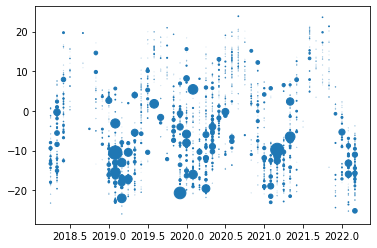

In [12]:
plt.scatter(dfu.yyyy + dfu.mm/12., dfu.coastlat, dfu.areatime/500)

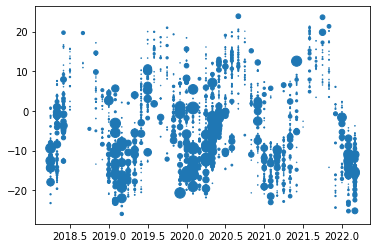

In [13]:
plt.scatter(dfu.yyyy + dfu.mm/12., dfu.coastlat, dfu.maxarea/5)

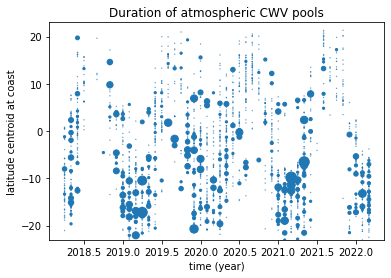

In [14]:
# Duration as dot size 

fig, ax = plt.subplots()
ax.set_ylim(-23,23)
ax.set_title('Duration of atmospheric CWV pools')
ax.set_ylabel('latitude centroid at coast')
ax.set_xlabel('time (year)')
plt.scatter(dfu.yyyy + dfu.mm/12., dfu.coastlat, 5*dfu.dur_days+0.1)

Text(0.5, 1.0, 'historgram of duration in days')

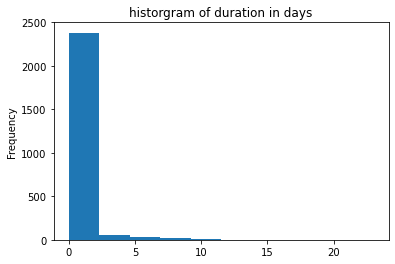

In [15]:
dfu.dur_days.plot.hist(); plt.title('historgram of duration in days')

# Size screening for big ones
## duration > 1 day is more interesting than size per se

In [16]:
# 3 or more days (dur_days >2) 
dfu_long = dfu[dfu.dur_days >2]
dfu_long.describe()

Unnamed: 0      areatime  tqv_values     maxarea    dur_days  \
count   124.000000    124.000000       124.0  124.000000  124.000000   
mean   1410.653226  12599.079700        55.0  154.365841    6.000000   
std     798.646793  15764.854420         0.0  139.669203    3.655934   
min      50.000000    546.962394        55.0   15.691960    3.000000   
25%     669.000000   2891.602007        55.0   63.060928    3.750000   
50%    1514.500000   6335.720344        55.0  100.433449    5.000000   
75%    2125.250000  18012.873030        55.0  196.213285    7.000000   
max    2686.000000  89711.703836        55.0  849.848370   23.000000   

              yyyy          mm    coastlat  
count   124.000000  124.000000  124.000000  
mean   2019.693548    5.854839   -7.411895  
std       1.176860    4.051886    9.361787  
min    2018.000000    1.000000  -25.210000  
25%    2019.000000    2.000000  -15.625000  
50%    2020.000000    4.000000   -8.887000  
75%    2021.000000   10.250000   -1.091750  
max    2022.000000   12.000000   19.720000

In [26]:
equator_longcases = dfu[ abs(dfu.coastlat) < 10 ] # 162 of them exceeding 1 day 

len(equator_longcases[ equator_longcases.dur_days > 2 ]) # 60 exceeding 2 days in 2014-2018 
#len(equator_longcases[ equator_longcases.dur_days > 3 ]) # 47 exceeding 3 days 
#len(equator_longcases[ equator_longcases.dur_days > 4 ]) # 36 exceeding 4 days 
#len(equator_longcases[ equator_longcases.dur_days > 5 ]) # 25 exceeding 5 days 
#len(equator_longcases[ equator_longcases.dur_days > 6 ]) # 17 exceeding 6 days 
#len(equator_longcases[ equator_longcases.dur_days > 7 ]) # 12 exceeding 7 days 
#len(equator_longcases[ equator_longcases.dur_days > 8 ]) # 10 exceeding 8 days 
#len(equator_longcases[ equator_longcases.dur_days > 9 ]) # 7 exceeding 9 days 
#len(equator_longcases[ equator_longcases.dur_days > 10 ]) # 4 exceeding 10 days 

63

In [21]:
equator_longcases.describe()

Unnamed: 0      areatime  tqv_values     maxarea   dur_days  \
count    63.000000     63.000000        63.0   63.000000  63.000000   
mean   1429.888889  12135.215007        55.0  143.670818   5.873016   
std     796.956309  14894.618984         0.0  112.976627   3.799372   
min      51.000000    709.810974        55.0   15.691960   3.000000   
25%     654.000000   2998.641161        55.0   66.345740   3.500000   
50%    1595.000000   5694.925475        55.0  100.624300   5.000000   
75%    2029.500000  18401.059406        55.0  198.958776   7.000000   
max    2686.000000  84905.799509        55.0  542.131960  23.000000   

              yyyy         mm   coastlat  
count    63.000000  63.000000  63.000000  
mean   2019.603175   6.571429  -1.815317  
std       1.171430   3.705768   5.552493  
min    2018.000000   1.000000  -9.810000  
25%    2019.000000   4.000000  -6.321500  
50%    2019.000000   5.000000  -2.171000  
75%    2021.000000  10.000000   2.348500  
max    2022.000000  12.000000   9.796000

<a id="eqlongcases"></a>

# Long-lived equatorial cases: 7 or more days  

[link: 2021_05_03_08](https://worldview.earthdata.nasa.gov/?v=25,-37,110,20&l=IMERG_Precipitation_Rate(hidden,opacity=0.48,palette=red_1;),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.51,max=11.1,squash=true),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Ascending(hidden,opacity=0.5,max=11.1,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.5,max=10.8,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Ascending(hidden,max=11.1,squash=true),Reference_Features_15m,Coastlines_15m,Graticule,SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Descending(hidden),SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Ascending(hidden),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Descending(opacity=0.24,palette=rainbow_2,min=50,max=69,squash=true),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Ascending(opacity=0.3,palette=rainbow_2,min=50.5,max=68,squash=true),GHRSST_L4_MUR25_Sea_Surface_Temperature_Anomalies(hidden,palette=divergent_1),MODIS_Aqua_CorrectedReflectance_TrueColor(hidden),MODIS_Terra_CorrectedReflectance_TrueColor(hidden),VIIRS_SNPP_CorrectedReflectance_TrueColor&lg=true&t=2021-05-03-08%3A00%3A00Z)

[link: 2021_04_30_15](https://worldview.earthdata.nasa.gov/?v=25,-37,110,20&l=IMERG_Precipitation_Rate(hidden,opacity=0.48,palette=red_1;),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.51,max=11.1,squash=true),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Ascending(hidden,opacity=0.5,max=11.1,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.5,max=10.8,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Ascending(hidden,max=11.1,squash=true),Reference_Features_15m,Coastlines_15m,Graticule,SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Descending(hidden),SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Ascending(hidden),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Descending(opacity=0.24,palette=rainbow_2,min=50,max=69,squash=true),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Ascending(opacity=0.3,palette=rainbow_2,min=50.5,max=68,squash=true),GHRSST_L4_MUR25_Sea_Surface_Temperature_Anomalies(hidden,palette=divergent_1),MODIS_Aqua_CorrectedReflectance_TrueColor(hidden),MODIS_Terra_CorrectedReflectance_TrueColor(hidden),VIIRS_SNPP_CorrectedReflectance_TrueColor&lg=true&t=2021-04-30-15%3A00%3A00Z)

[link: 2021_04_20_20](https://worldview.earthdata.nasa.gov/?v=25,-37,110,20&l=IMERG_Precipitation_Rate(hidden,opacity=0.48,palette=red_1;),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.51,max=11.1,squash=true),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Ascending(hidden,opacity=0.5,max=11.1,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.5,max=10.8,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Ascending(hidden,max=11.1,squash=true),Reference_Features_15m,Coastlines_15m,Graticule,SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Descending(hidden),SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Ascending(hidden),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Descending(opacity=0.24,palette=rainbow_2,min=50,max=69,squash=true),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Ascending(opacity=0.3,palette=rainbow_2,min=50.5,max=68,squash=true),GHRSST_L4_MUR25_Sea_Surface_Temperature_Anomalies(hidden,palette=divergent_1),MODIS_Aqua_CorrectedReflectance_TrueColor(hidden),MODIS_Terra_CorrectedReflectance_TrueColor(hidden),VIIRS_SNPP_CorrectedReflectance_TrueColor&lg=true&t=2021-04-20-20%3A00%3A00Z)

[link: 2021_04_19_14](https://worldview.earthdata.nasa.gov/?v=25,-37,110,20&l=IMERG_Precipitation_Rate(hidden,opacity=0.48,palette=red_1;),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.51,max=11.1,squash=true),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Ascending(hidden,opacity=0.5,max=11.1,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.5,max=10.8,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Ascending(hidden,max=11.1,squash=true),Reference_Features_15m,Coastlines_15m,Graticule,SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Descending(hidden),SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Ascending(hidden),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Descending(opacity=0.24,palette=rainbow_2,min=50,max=69,squash=true),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Ascending(opacity=0.3,palette=rainbow_2,min=50.5,max=68,squash=true),GHRSST_L4_MUR25_Sea_Surface_Temperature_Anomalies(hidden,palette=divergent_1),MODIS_Aqua_CorrectedReflectance_TrueColor(hidden),MODIS_Terra_CorrectedReflectance_TrueColor(hidden),VIIRS_SNPP_CorrectedReflectance_TrueColor&lg=true&t=2021-04-19-14%3A00%3A00Z)

[link: 2021_02_23_06](https://worldview.earthdata.nasa.gov/?v=25,-37,110,20&l=IMERG_Precipitation_Rate(hidden,opacity=0.48,palette=red_1;),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.51,max=11.1,squash=true),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Ascending(hidden,opacity=0.5,max=11.1,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.5,max=10.8,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Ascending(hidden,max=11.1,squash=true),Reference_Features_15m,Coastlines_15m,Graticule,SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Descending(hidden),SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Ascending(hidden),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Descending(opacity=0.24,palette=rainbow_2,min=50,max=69,squash=true),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Ascending(opacity=0.3,palette=rainbow_2,min=50.5,max=68,squash=true),GHRSST_L4_MUR25_Sea_Surface_Temperature_Anomalies(hidden,palette=divergent_1),MODIS_Aqua_CorrectedReflectance_TrueColor(hidden),MODIS_Terra_CorrectedReflectance_TrueColor(hidden),VIIRS_SNPP_CorrectedReflectance_TrueColor&lg=true&t=2021-02-23-06%3A00%3A00Z)

[link: 2020_06_11_12](https://worldview.earthdata.nasa.gov/?v=25,-37,110,20&l=IMERG_Precipitation_Rate(hidden,opacity=0.48,palette=red_1;),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.51,max=11.1,squash=true),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Ascending(hidden,opacity=0.5,max=11.1,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.5,max=10.8,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Ascending(hidden,max=11.1,squash=true),Reference_Features_15m,Coastlines_15m,Graticule,SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Descending(hidden),SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Ascending(hidden),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Descending(opacity=0.24,palette=rainbow_2,min=50,max=69,squash=true),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Ascending(opacity=0.3,palette=rainbow_2,min=50.5,max=68,squash=true),GHRSST_L4_MUR25_Sea_Surface_Temperature_Anomalies(hidden,palette=divergent_1),MODIS_Aqua_CorrectedReflectance_TrueColor(hidden),MODIS_Terra_CorrectedReflectance_TrueColor(hidden),VIIRS_SNPP_CorrectedReflectance_TrueColor&lg=true&t=2020-06-11-12%3A00%3A00Z)

[link: 2019_12_17_20](https://worldview.earthdata.nasa.gov/?v=25,-37,110,20&l=IMERG_Precipitation_Rate(hidden,opacity=0.48,palette=red_1;),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.51,max=11.1,squash=true),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Ascending(hidden,opacity=0.5,max=11.1,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.5,max=10.8,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Ascending(hidden,max=11.1,squash=true),Reference_Features_15m,Coastlines_15m,Graticule,SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Descending(hidden),SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Ascending(hidden),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Descending(opacity=0.24,palette=rainbow_2,min=50,max=69,squash=true),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Ascending(opacity=0.3,palette=rainbow_2,min=50.5,max=68,squash=true),GHRSST_L4_MUR25_Sea_Surface_Temperature_Anomalies(hidden,palette=divergent_1),MODIS_Aqua_CorrectedReflectance_TrueColor(hidden),MODIS_Terra_CorrectedReflectance_TrueColor(hidden),VIIRS_SNPP_CorrectedReflectance_TrueColor&lg=true&t=2019-12-17-20%3A00%3A00Z)

[link: 2019_12_16_12](https://worldview.earthdata.nasa.gov/?v=25,-37,110,20&l=IMERG_Precipitation_Rate(hidden,opacity=0.48,palette=red_1;),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.51,max=11.1,squash=true),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Ascending(hidden,opacity=0.5,max=11.1,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.5,max=10.8,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Ascending(hidden,max=11.1,squash=true),Reference_Features_15m,Coastlines_15m,Graticule,SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Descending(hidden),SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Ascending(hidden),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Descending(opacity=0.24,palette=rainbow_2,min=50,max=69,squash=true),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Ascending(opacity=0.3,palette=rainbow_2,min=50.5,max=68,squash=true),GHRSST_L4_MUR25_Sea_Surface_Temperature_Anomalies(hidden,palette=divergent_1),MODIS_Aqua_CorrectedReflectance_TrueColor(hidden),MODIS_Terra_CorrectedReflectance_TrueColor(hidden),VIIRS_SNPP_CorrectedReflectance_TrueColor&lg=true&t=2019-12-16-12%3A00%3A00Z)

[link: 2019_11_13_18](https://worldview.earthdata.nasa.gov/?v=25,-37,110,20&l=IMERG_Precipitation_Rate(hidden,opacity=0.48,palette=red_1;),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.51,max=11.1,squash=true),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Ascending(hidden,opacity=0.5,max=11.1,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.5,max=10.8,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Ascending(hidden,max=11.1,squash=true),Reference_Features_15m,Coastlines_15m,Graticule,SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Descending(hidden),SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Ascending(hidden),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Descending(opacity=0.24,palette=rainbow_2,min=50,max=69,squash=true),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Ascending(opacity=0.3,palette=rainbow_2,min=50.5,max=68,squash=true),GHRSST_L4_MUR25_Sea_Surface_Temperature_Anomalies(hidden,palette=divergent_1),MODIS_Aqua_CorrectedReflectance_TrueColor(hidden),MODIS_Terra_CorrectedReflectance_TrueColor(hidden),VIIRS_SNPP_CorrectedReflectance_TrueColor&lg=true&t=2019-11-13-18%3A00%3A00Z)

[link: 2019_11_06_06](https://worldview.earthdata.nasa.gov/?v=25,-37,110,20&l=IMERG_Precipitation_Rate(hidden,opacity=0.48,palette=red_1;),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.51,max=11.1,squash=true),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Ascending(hidden,opacity=0.5,max=11.1,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.5,max=10.8,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Ascending(hidden,max=11.1,squash=true),Reference_Features_15m,Coastlines_15m,Graticule,SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Descending(hidden),SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Ascending(hidden),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Descending(opacity=0.24,palette=rainbow_2,min=50,max=69,squash=true),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Ascending(opacity=0.3,palette=rainbow_2,min=50.5,max=68,squash=true),GHRSST_L4_MUR25_Sea_Surface_Temperature_Anomalies(hidden,palette=divergent_1),MODIS_Aqua_CorrectedReflectance_TrueColor(hidden),MODIS_Terra_CorrectedReflectance_TrueColor(hidden),VIIRS_SNPP_CorrectedReflectance_TrueColor&lg=true&t=2019-11-06-06%3A00%3A00Z)

[link: 2019_10_27_11](https://worldview.earthdata.nasa.gov/?v=25,-37,110,20&l=IMERG_Precipitation_Rate(hidden,opacity=0.48,palette=red_1;),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.51,max=11.1,squash=true),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Ascending(hidden,opacity=0.5,max=11.1,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.5,max=10.8,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Ascending(hidden,max=11.1,squash=true),Reference_Features_15m,Coastlines_15m,Graticule,SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Descending(hidden),SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Ascending(hidden),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Descending(opacity=0.24,palette=rainbow_2,min=50,max=69,squash=true),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Ascending(opacity=0.3,palette=rainbow_2,min=50.5,max=68,squash=true),GHRSST_L4_MUR25_Sea_Surface_Temperature_Anomalies(hidden,palette=divergent_1),MODIS_Aqua_CorrectedReflectance_TrueColor(hidden),MODIS_Terra_CorrectedReflectance_TrueColor(hidden),VIIRS_SNPP_CorrectedReflectance_TrueColor&lg=true&t=2019-10-27-11%3A00%3A00Z)

[link: 2019_10_11_02](https://worldview.earthdata.nasa.gov/?v=25,-37,110,20&l=IMERG_Precipitation_Rate(hidden,opacity=0.48,palette=red_1;),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.51,max=11.1,squash=true),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Ascending(hidden,opacity=0.5,max=11.1,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.5,max=10.8,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Ascending(hidden,max=11.1,squash=true),Reference_Features_15m,Coastlines_15m,Graticule,SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Descending(hidden),SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Ascending(hidden),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Descending(opacity=0.24,palette=rainbow_2,min=50,max=69,squash=true),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Ascending(opacity=0.3,palette=rainbow_2,min=50.5,max=68,squash=true),GHRSST_L4_MUR25_Sea_Surface_Temperature_Anomalies(hidden,palette=divergent_1),MODIS_Aqua_CorrectedReflectance_TrueColor(hidden),MODIS_Terra_CorrectedReflectance_TrueColor(hidden),VIIRS_SNPP_CorrectedReflectance_TrueColor&lg=true&t=2019-10-11-02%3A00%3A00Z)

[link: 2019_08_24_14](https://worldview.earthdata.nasa.gov/?v=25,-37,110,20&l=IMERG_Precipitation_Rate(hidden,opacity=0.48,palette=red_1;),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.51,max=11.1,squash=true),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Ascending(hidden,opacity=0.5,max=11.1,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.5,max=10.8,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Ascending(hidden,max=11.1,squash=true),Reference_Features_15m,Coastlines_15m,Graticule,SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Descending(hidden),SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Ascending(hidden),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Descending(opacity=0.24,palette=rainbow_2,min=50,max=69,squash=true),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Ascending(opacity=0.3,palette=rainbow_2,min=50.5,max=68,squash=true),GHRSST_L4_MUR25_Sea_Surface_Temperature_Anomalies(hidden,palette=divergent_1),MODIS_Aqua_CorrectedReflectance_TrueColor(hidden),MODIS_Terra_CorrectedReflectance_TrueColor(hidden),VIIRS_SNPP_CorrectedReflectance_TrueColor&lg=true&t=2019-08-24-14%3A00%3A00Z)

[link: 2019_07_08_02](https://worldview.earthdata.nasa.gov/?v=25,-37,110,20&l=IMERG_Precipitation_Rate(hidden,opacity=0.48,palette=red_1;),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.51,max=11.1,squash=true),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Ascending(hidden,opacity=0.5,max=11.1,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.5,max=10.8,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Ascending(hidden,max=11.1,squash=true),Reference_Features_15m,Coastlines_15m,Graticule,SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Descending(hidden),SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Ascending(hidden),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Descending(opacity=0.24,palette=rainbow_2,min=50,max=69,squash=true),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Ascending(opacity=0.3,palette=rainbow_2,min=50.5,max=68,squash=true),GHRSST_L4_MUR25_Sea_Surface_Temperature_Anomalies(hidden,palette=divergent_1),MODIS_Aqua_CorrectedReflectance_TrueColor(hidden),MODIS_Terra_CorrectedReflectance_TrueColor(hidden),VIIRS_SNPP_CorrectedReflectance_TrueColor&lg=true&t=2019-07-08-02%3A00%3A00Z)

[link: 2018_11_20_11](https://worldview.earthdata.nasa.gov/?v=25,-37,110,20&l=IMERG_Precipitation_Rate(hidden,opacity=0.48,palette=red_1;),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.51,max=11.1,squash=true),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Ascending(hidden,opacity=0.5,max=11.1,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.5,max=10.8,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Ascending(hidden,max=11.1,squash=true),Reference_Features_15m,Coastlines_15m,Graticule,SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Descending(hidden),SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Ascending(hidden),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Descending(opacity=0.24,palette=rainbow_2,min=50,max=69,squash=true),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Ascending(opacity=0.3,palette=rainbow_2,min=50.5,max=68,squash=true),GHRSST_L4_MUR25_Sea_Surface_Temperature_Anomalies(hidden,palette=divergent_1),MODIS_Aqua_CorrectedReflectance_TrueColor(hidden),MODIS_Terra_CorrectedReflectance_TrueColor(hidden),VIIRS_SNPP_CorrectedReflectance_TrueColor&lg=true&t=2018-11-20-11%3A00%3A00Z)

[link: 2018_11_16_21](https://worldview.earthdata.nasa.gov/?v=25,-37,110,20&l=IMERG_Precipitation_Rate(hidden,opacity=0.48,palette=red_1;),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.51,max=11.1,squash=true),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Ascending(hidden,opacity=0.5,max=11.1,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.5,max=10.8,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Ascending(hidden,max=11.1,squash=true),Reference_Features_15m,Coastlines_15m,Graticule,SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Descending(hidden),SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Ascending(hidden),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Descending(opacity=0.24,palette=rainbow_2,min=50,max=69,squash=true),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Ascending(opacity=0.3,palette=rainbow_2,min=50.5,max=68,squash=true),GHRSST_L4_MUR25_Sea_Surface_Temperature_Anomalies(hidden,palette=divergent_1),MODIS_Aqua_CorrectedReflectance_TrueColor(hidden),MODIS_Terra_CorrectedReflectance_TrueColor(hidden),VIIRS_SNPP_CorrectedReflectance_TrueColor&lg=true&t=2018-11-16-21%3A00%3A00Z)

[link: 2018_10_22_15](https://worldview.earthdata.nasa.gov/?v=25,-37,110,20&l=IMERG_Precipitation_Rate(hidden,opacity=0.48,palette=red_1;),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.51,max=11.1,squash=true),SSMI_DMSP_F17_Wind_Speed_Over_Oceans_Ascending(hidden,opacity=0.5,max=11.1,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Descending(hidden,opacity=0.5,max=10.8,squash=true),SSMI_DMSP_F16_Wind_Speed_Over_Oceans_Ascending(hidden,max=11.1,squash=true),Reference_Features_15m,Coastlines_15m,Graticule,SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Descending(hidden),SSMI_DMSP_F17_Water_Vapor_Over_Oceans_Ascending(hidden),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Descending(opacity=0.24,palette=rainbow_2,min=50,max=69,squash=true),SSMI_DMSP_F16_Water_Vapor_Over_Oceans_Ascending(opacity=0.3,palette=rainbow_2,min=50.5,max=68,squash=true),GHRSST_L4_MUR25_Sea_Surface_Temperature_Anomalies(hidden,palette=divergent_1),MODIS_Aqua_CorrectedReflectance_TrueColor(hidden),MODIS_Terra_CorrectedReflectance_TrueColor(hidden),VIIRS_SNPP_CorrectedReflectance_TrueColor&lg=true&t=2018-10-22-15%3A00%3A00Z)

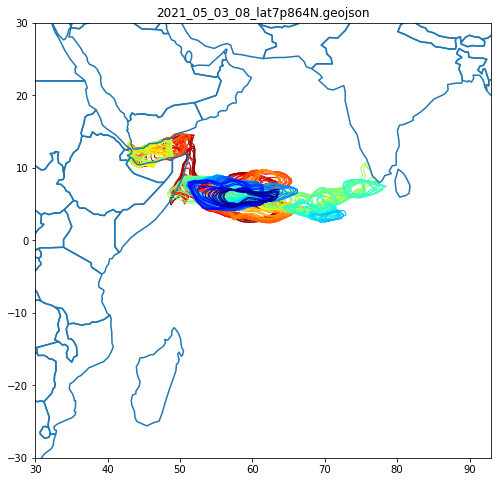

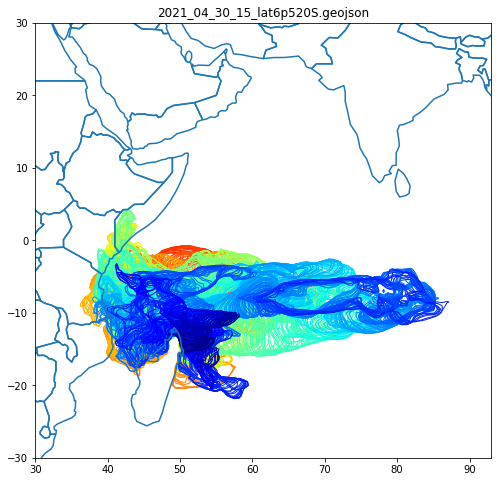

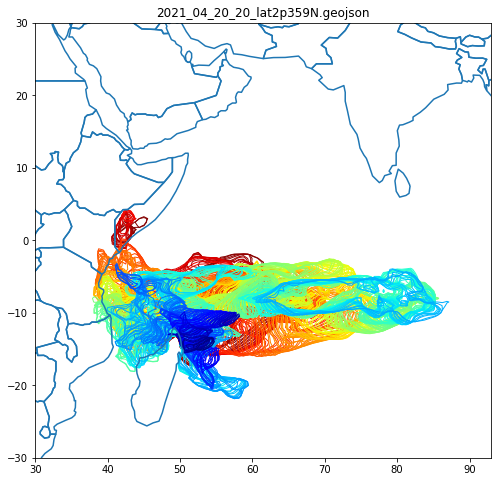

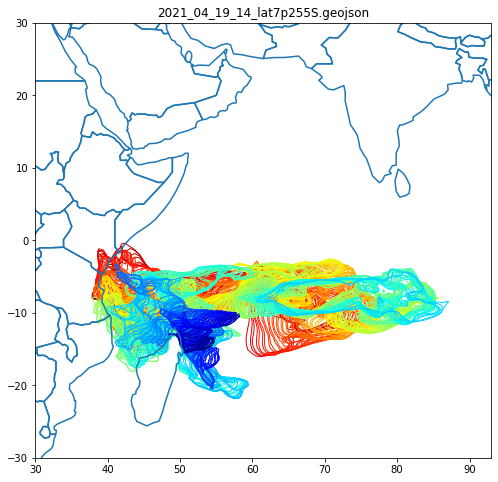

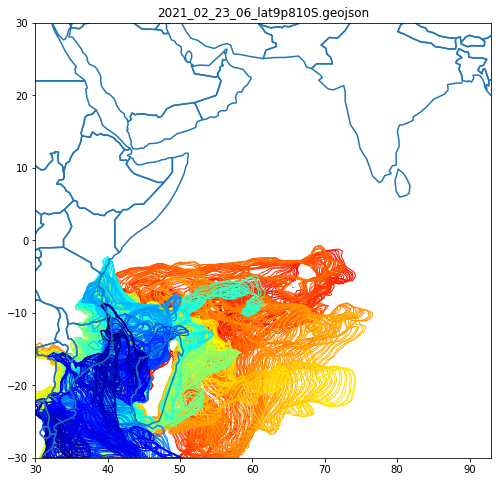

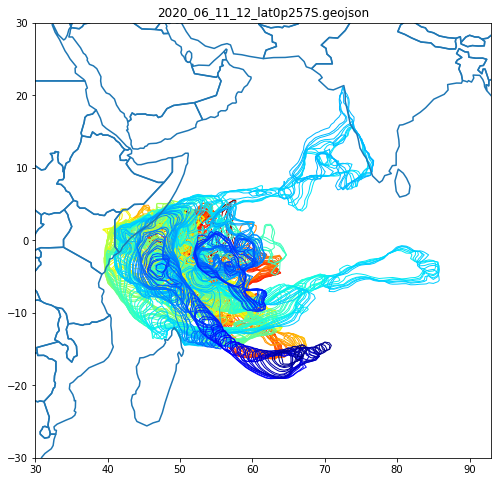

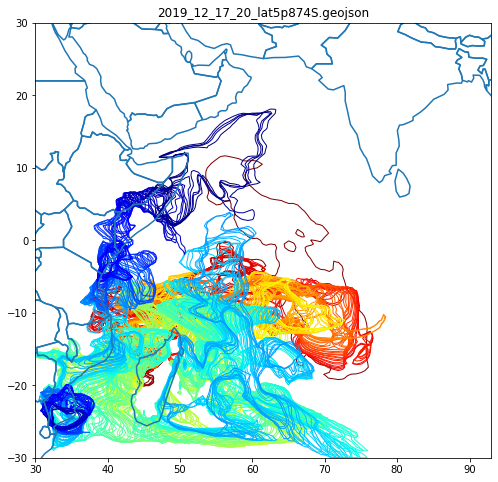

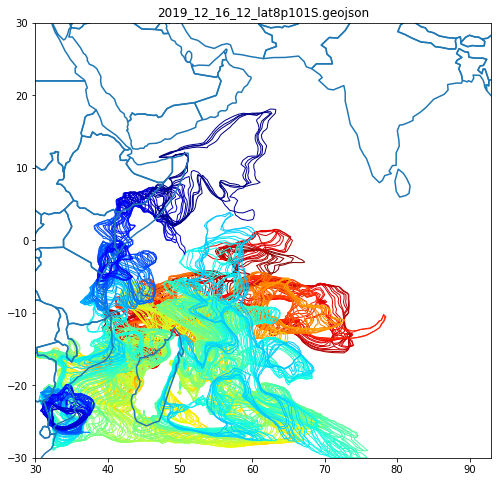

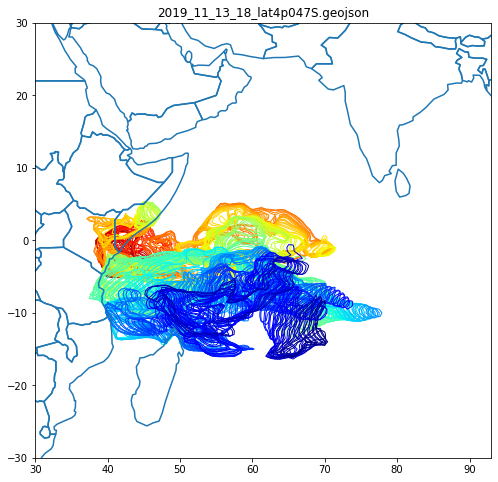

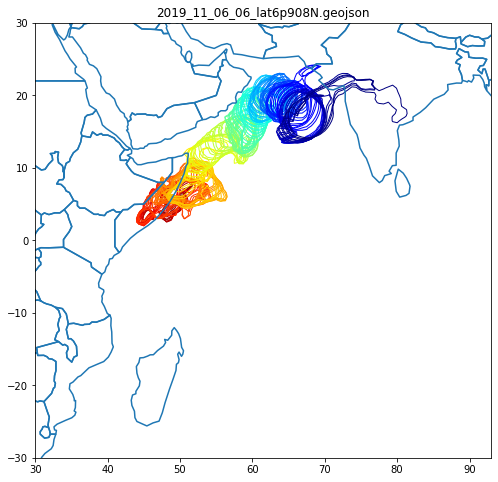

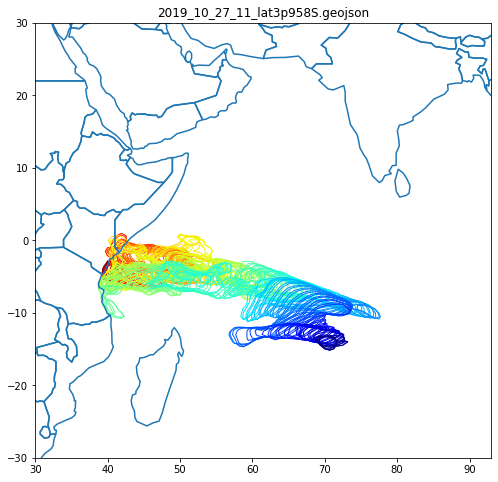

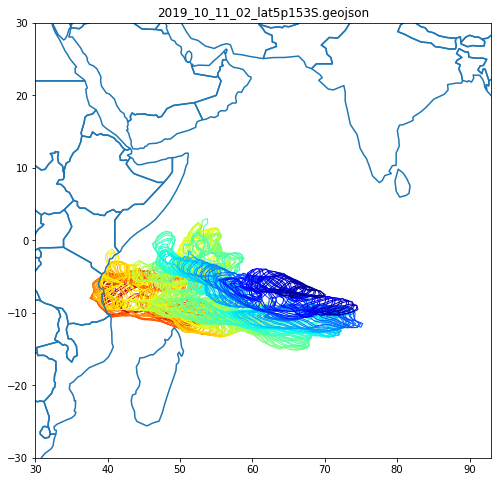

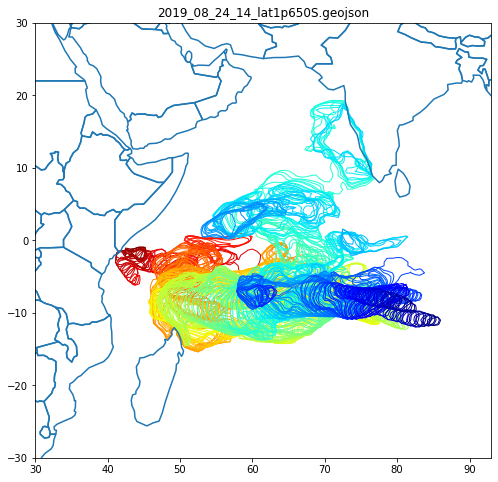

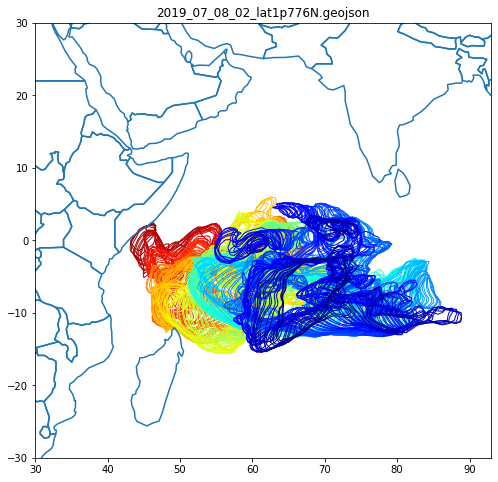

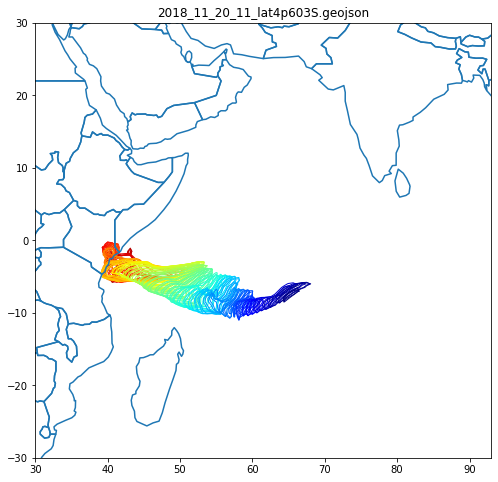

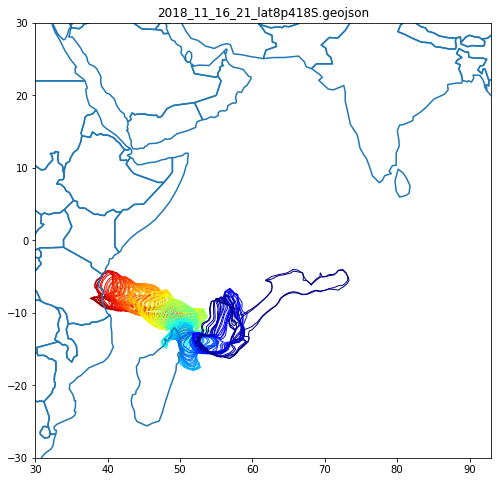

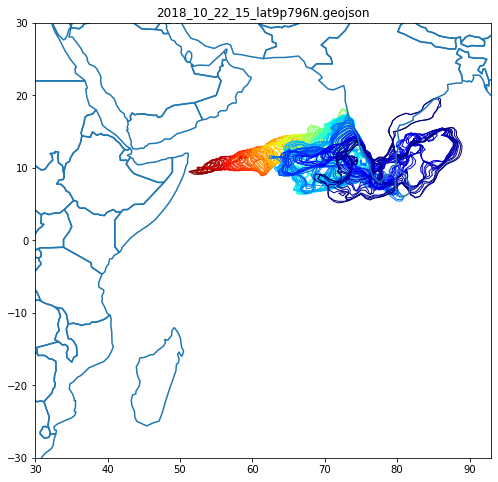

In [28]:
eq7cases = equator_longcases[ equator_longcases.dur_days > 6 ]
for file in eq7cases.filename: 
    showme(file, file);

## Older results from 2014-2018, not erased here 

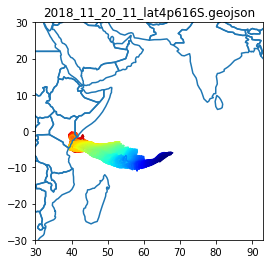

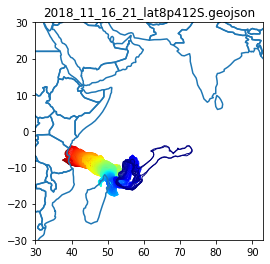

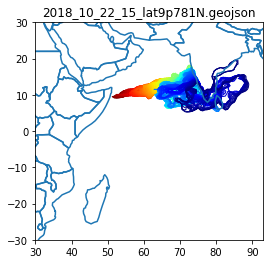

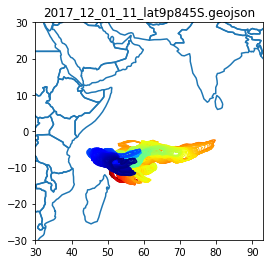

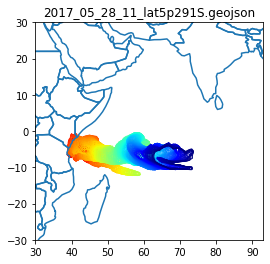

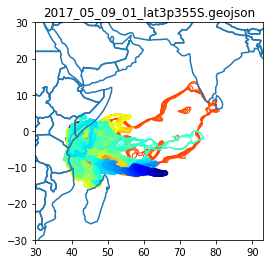

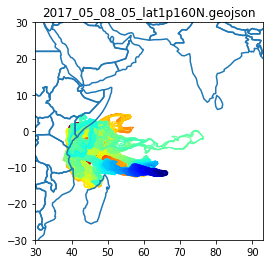

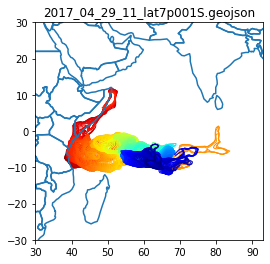

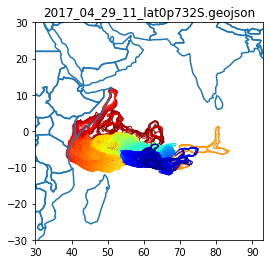

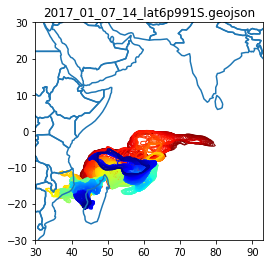

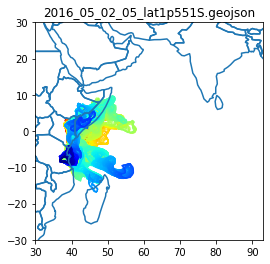

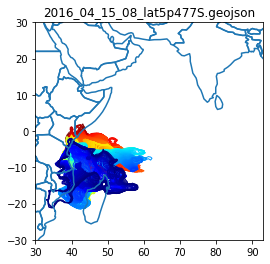

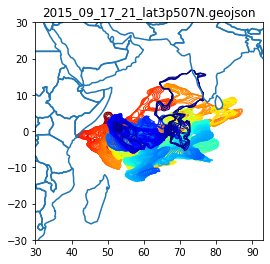

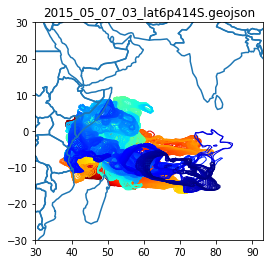

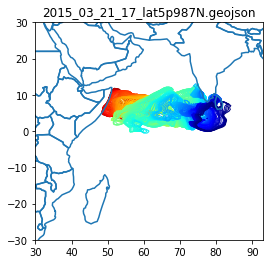

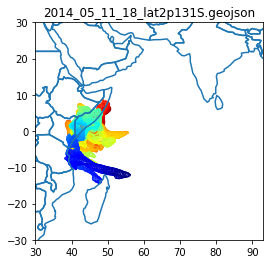

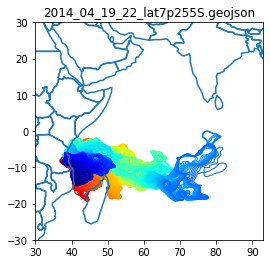

In [489]:
eq7dcases = equator_longcases[ equator_longcases.dur_days > 6 ]
for file in eq7cases.filename: 
    gdf = showme(file)

In [474]:
horncases = dfu_long[ (dfu_long.coastlat) > 10 ] # about a dozen
horncases

Unnamed: 0             lasttime         duration     areatime  \
138          138  2018-10-15 05:00:00  6 days 08:00:00  6556.689566   
162          162  2018-06-06 22:00:00  1 days 17:00:00   170.383847   
193          193  2018-05-27 13:00:00  3 days 01:00:00  1863.468630   
700          700  2017-11-09 08:00:00  1 days 08:00:00   395.409853   
896          896  2017-05-16 09:00:00  1 days 23:00:00   479.228467   
933          933  2017-05-01 01:00:00  1 days 02:00:00   100.855653   
1343        1343  2016-07-31 09:00:00  2 days 05:00:00  2041.861504   
1457        1457  2016-04-16 09:00:00  3 days 10:00:00  1033.812542   
1829        1829  2015-11-20 08:00:00  1 days 11:00:00   170.344179   
1965        1965  2015-06-12 03:00:00  2 days 11:00:00  2308.793230   
2434        2434  2014-05-17 06:00:00  2 days 03:00:00  1968.376675   

      tqv_values    maxarea                         filename           ymdh  \
138         55.0  88.656819  2018_10_15_05_lat14p60N.geojson  2018_10_15_05   
162         55.0   6.778012  2018_06_06_22_lat13p28N.geojson  2018_06_06_22   
193         55.0  63.162654  2018_05_27_13_lat19p73N.geojson  2018_05_27_13   
700         55.0  20.468933  2017_11_09_08_lat14p42N.geojson  2017_11_09_08   
896         55.0  21.130774  2017_05_16_09_lat12p74N.geojson  2017_05_16_09   
933         55.0   5.984780  2017_05_01_01_lat12p03N.geojson  2017_05_01_01   
1343        55.0  47.623089  2016_07_31_09_lat14p67N.geojson  2016_07_31_09   
1457        55.0  22.302923  2016_04_16_09_lat14p64N.geojson  2016_04_16_09   
1829        55.0   8.449090  2015_11_20_08_lat10p36N.geojson  2015_11_20_08   
1965        55.0  65.210616  2015_06_12_03_lat20p89N.geojson  2015_06_12_03   
2434        55.0  89.180362  2014_05_17_06_lat10p43N.geojson  2014_05_17_06   

      dur_days  yyyy  mm  coastlat  
138          6  2018  10     14.60  
162          1  2018   6     13.28  
193          3  2018   5     19.73  
700          1  2017  11     14.42  
896          1  2017   5     12.74  
933          1  2017   5     12.03  
1343         2  2016   7     14.67  
1457         3  2016   4     14.64  
1829         1  2015  11     10.36  
1965         2  2015   6     20.89  
2434         2  2014   5     10.43

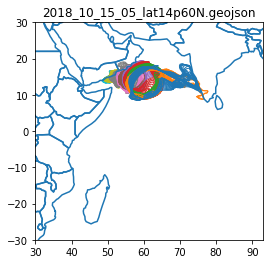

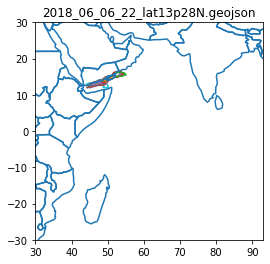

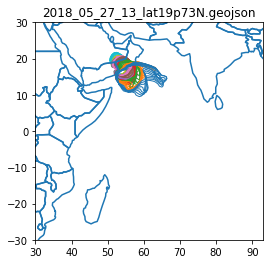

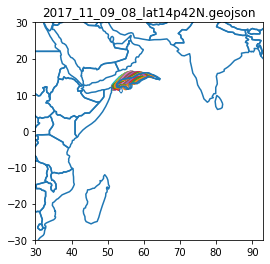

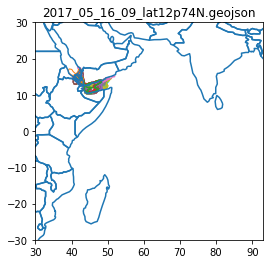

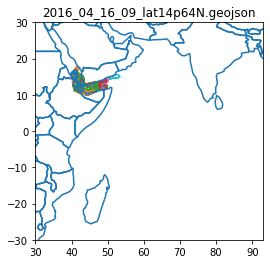

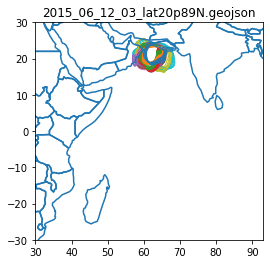

In [475]:
for file in horncases.filename: 
    gdf = showme(file)

In [479]:
SHcases = dfu_long[ dfu_long.coastlat < -10 ] #  of them exceeding 1 day 
SH7cases = SHcases[ SHcases.dur_days > 6 ] # 31 of them  
len(SH7cases)

31

<ipython-input-301-8ebb951dfd07>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


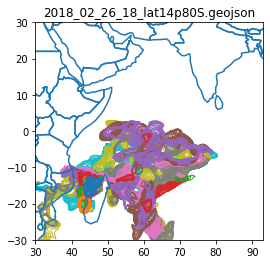

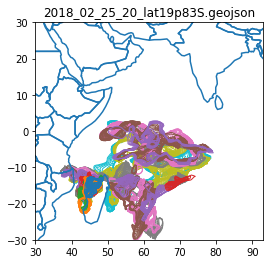

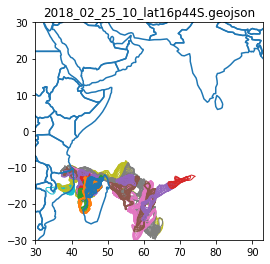

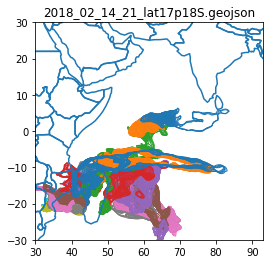

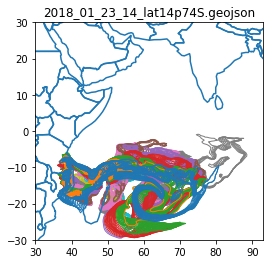

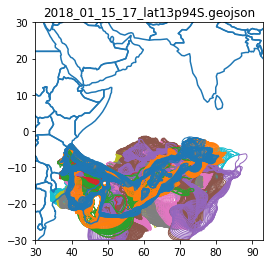

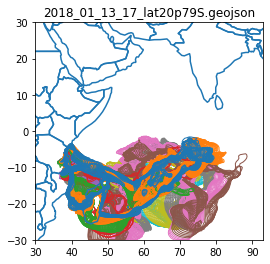

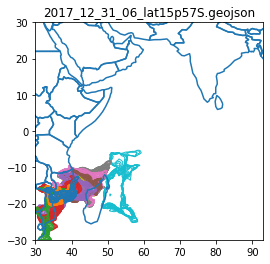

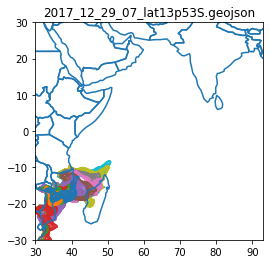

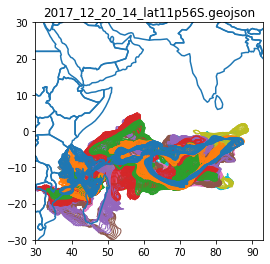

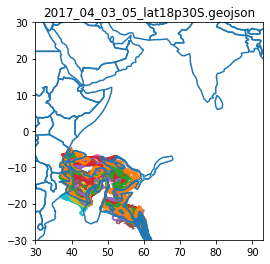

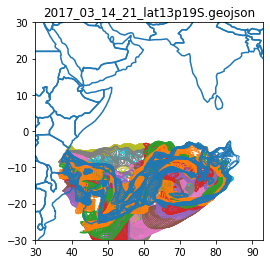

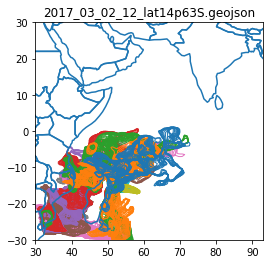

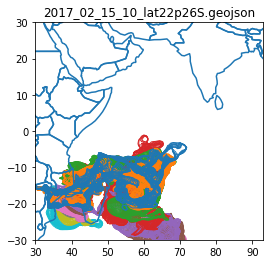

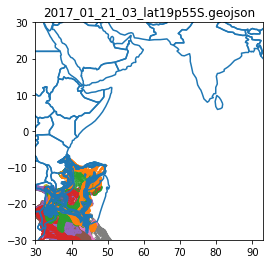

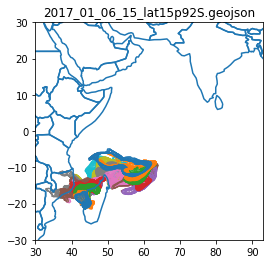

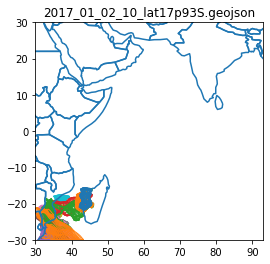

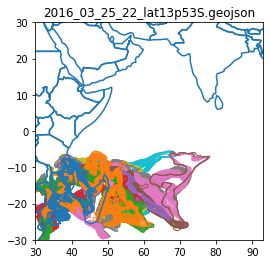

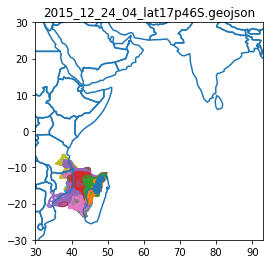

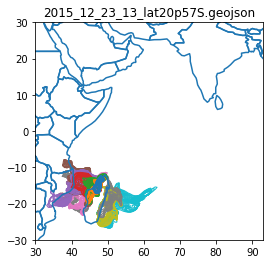

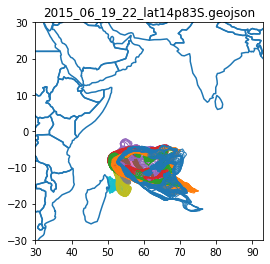

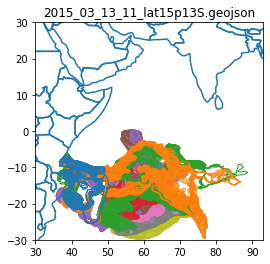

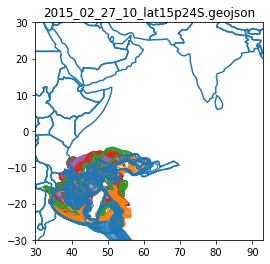

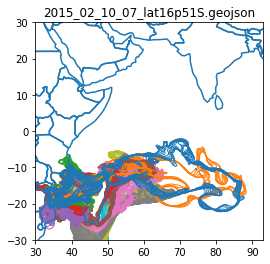

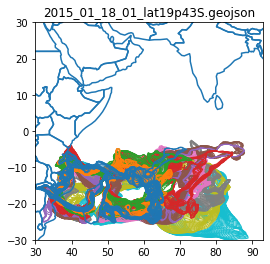

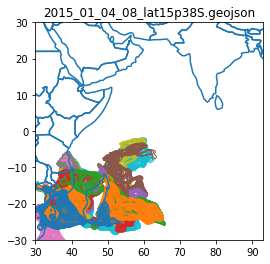

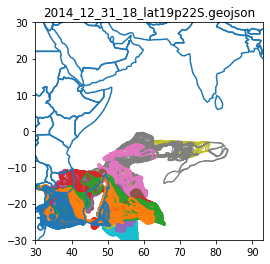

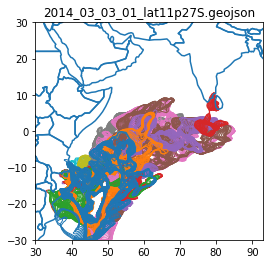

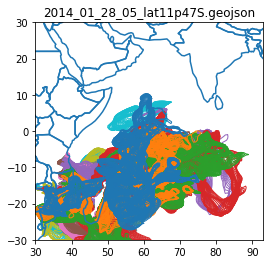

In [480]:
for file in SH7cases.filename: 
    gdf = showme(file)

In [453]:
biggies = dfu.sort_values('areatime', ascending=False)[0:10]
biggies

Unnamed: 0             lasttime          duration       areatime  \
2698           0  2014-01-28 05:00:00  27 days 05:00:00  140314.954315   
2263        2263  2015-01-18 01:00:00  10 days 12:00:00   86650.431899   
589          589  2018-01-15 17:00:00  11 days 14:00:00   76016.117437   
639          639  2017-12-20 14:00:00  11 days 20:00:00   66789.610035   
1654        1654  2016-01-26 17:00:00   4 days 19:00:00   57156.558526   
2172        2172  2015-03-13 11:00:00  13 days 15:00:00   54462.702745   
590          590  2018-01-13 17:00:00   9 days 14:00:00   54144.405837   
2283        2283  2015-01-04 08:00:00  19 days 16:00:00   54081.023444   
1087        1087  2017-03-14 21:00:00   7 days 03:00:00   52408.361466   
1506        1506  2016-03-25 22:00:00  11 days 17:00:00   45571.603834   

      tqv_values     maxarea                         filename           ymdh  \
2698        55.0  450.351350  2014_01_28_05_lat11p47S.geojson  2014_01_28_05   
2263        55.0  430.645702  2015_01_18_01_lat19p43S.geojson  2015_01_18_01   
589         55.0  397.221642  2018_01_15_17_lat13p94S.geojson  2018_01_15_17   
639         55.0  313.427667  2017_12_20_14_lat11p56S.geojson  2017_12_20_14   
1654        55.0  602.410193  2016_01_26_17_lat13p22S.geojson  2016_01_26_17   
2172        55.0  319.810743  2015_03_13_11_lat15p13S.geojson  2015_03_13_11   
590         55.0  352.936667  2018_01_13_17_lat20p79S.geojson  2018_01_13_17   
2283        55.0  257.891597  2015_01_04_08_lat15p38S.geojson  2015_01_04_08   
1087        55.0  408.540382  2017_03_14_21_lat13p19S.geojson  2017_03_14_21   
1506        55.0  258.826780  2016_03_25_22_lat13p53S.geojson  2016_03_25_22   

      dur_days  yyyy  mm  coastlat  
2698        27  2014   1    -11.47  
2263        10  2015   1    -19.43  
589         11  2018   1    -13.94  
639         11  2017  12    -11.56  
1654         4  2016   1    -13.22  
2172        13  2015   3    -15.13  
590          9  2018   1    -20.79  
2283        19  2015   1    -15.38  
1087         7  2017   3    -13.19  
1506        11  2016   3    -13.53

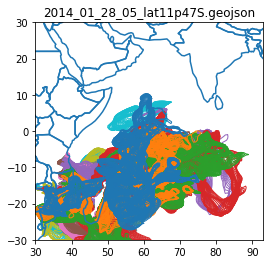

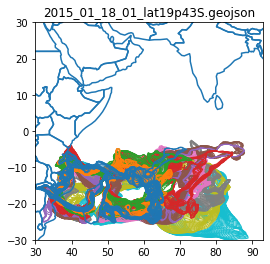

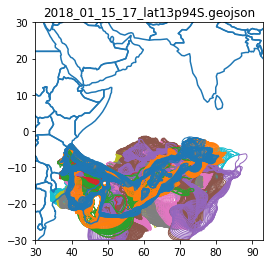

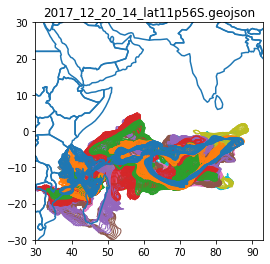

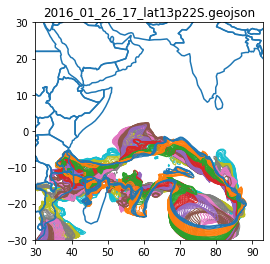

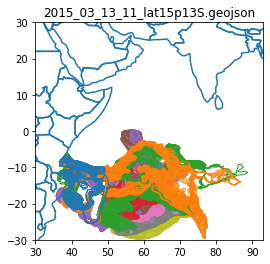

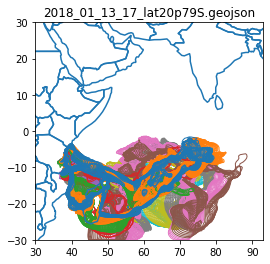

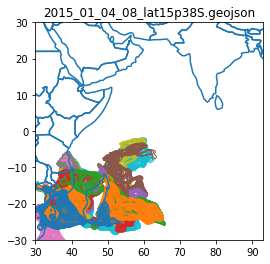

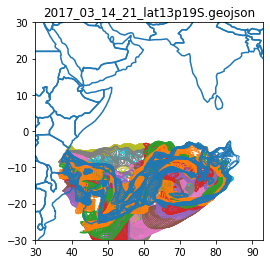

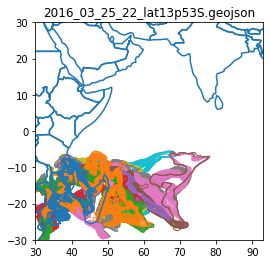

In [454]:
for file in biggies.filename: 
    gdf = showme(file)

In [455]:
longduration = dfu.sort_values('duration', ascending=False)[0:10]
longduration

Unnamed: 0             lasttime         duration      areatime  \
1759        1759  2015-12-23 13:00:00  9 days 18:00:00   5750.342293   
625          625  2017-12-29 07:00:00  9 days 17:00:00   9524.130325   
973          973  2017-04-29 11:00:00  9 days 15:00:00   7493.295378   
590          590  2018-01-13 17:00:00  9 days 14:00:00  54144.405837   
2193        2193  2015-02-27 10:00:00  9 days 09:00:00  22775.354693   
2471        2471  2014-05-11 18:00:00  9 days 09:00:00   6060.850143   
945          945  2017-05-08 05:00:00  9 days 07:00:00   9695.018611   
478          478  2018-02-26 18:00:00  9 days 06:00:00  27663.702069   
1964        1964  2015-06-19 22:00:00  8 days 21:00:00  13250.277194   
1229        1229  2017-01-07 14:00:00  8 days 19:00:00  12738.007722   

      tqv_values     maxarea                         filename           ymdh  \
1759        55.0   52.758027  2015_12_23_13_lat20p57S.geojson  2015_12_23_13   
625         55.0   77.557244  2017_12_29_07_lat13p53S.geojson  2017_12_29_07   
973         55.0   97.229094  2017_04_29_11_lat7p001S.geojson  2017_04_29_11   
590         55.0  352.936667  2018_01_13_17_lat20p79S.geojson  2018_01_13_17   
2193        55.0  218.583429  2015_02_27_10_lat15p24S.geojson  2015_02_27_10   
2471        55.0   72.174952  2014_05_11_18_lat2p131S.geojson  2014_05_11_18   
945         55.0  124.822389  2017_05_08_05_lat1p160N.geojson  2017_05_08_05   
478         55.0  305.017767  2018_02_26_18_lat14p80S.geojson  2018_02_26_18   
1964        55.0  155.181848  2015_06_19_22_lat14p83S.geojson  2015_06_19_22   
1229        55.0  203.820924  2017_01_07_14_lat6p991S.geojson  2017_01_07_14   

      dur_days  yyyy  mm  coastlat  
1759         9  2015  12   -20.570  
625          9  2017  12   -13.530  
973          9  2017   4    -7.001  
590          9  2018   1   -20.790  
2193         9  2015   2   -15.240  
2471         9  2014   5    -2.131  
945          9  2017   5     1.160  
478          9  2018   2   -14.800  
1964         8  2015   6   -14.830  
1229         8  2017   1    -6.991

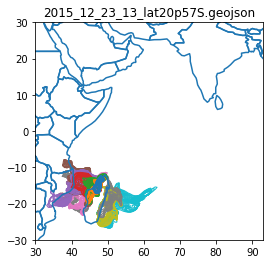

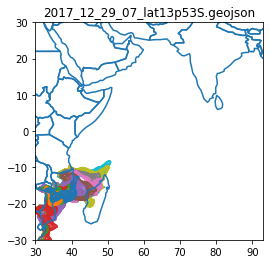

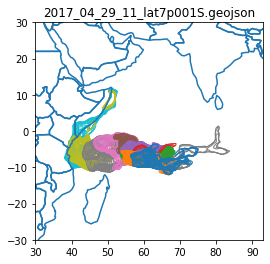

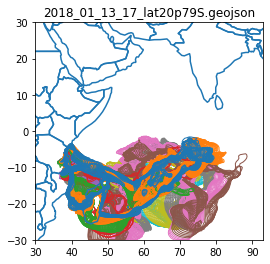

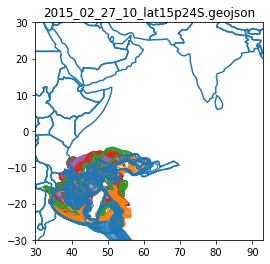

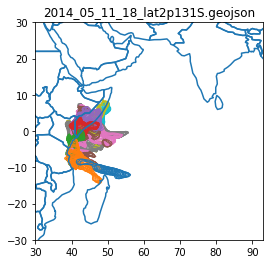

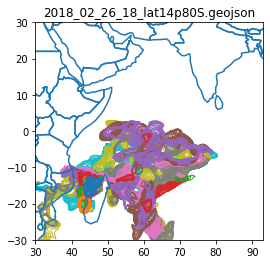

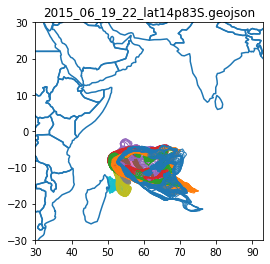

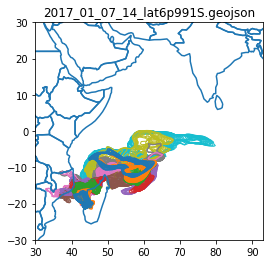

In [456]:
for file in longduration.filename: 
    gdf = showme(file)